In [1]:
from astropy.table import Table
import numpy
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransform

In [3]:
data = Table.read('data_PAH&AGN_removed.tbl',format='ipac')
PAH1 = Table.read('PAH_1.tbl',format='ipac')
PAH2 = Table.read('PAH_2.tbl',format='ipac')
AGN = Table.read('AGN.tbl',format='ipac')

In [4]:
x = data['mag4_5']-data['mag5_8']
y = data['mag3_6']-data['mag4_5']

shock_index = []
for i in range(0,len(data)):
    if y[i]>((1.2/0.55)*(x[i]-0.3)+0.8):
        if x[i]<=0.95:
            if y[i]>1.05:
                if data['d3_6m'][i]<0.2:
                    if data['d4_5m'][i]<0.2:
                        if data['d5_8m'][i]<0.2:
                            if data['d8_0m'][i]<0.2:
                                shock_index.append(i)

In [5]:
shock = data[shock_index]
shock.write('shock.tbl',format='ipac')

Text(0.5,1,'shock')

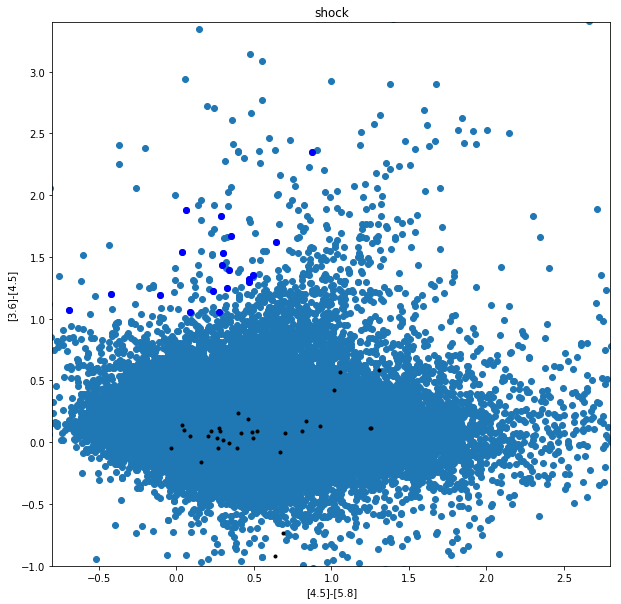

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.scatter(x[shock_index],y[shock_index], color = 'b')
plt.scatter(PAH1['mag4_5']-PAH1['mag5_8'],PAH1['mag3_6']-PAH1['mag4_5'],color='black',marker='.')
plt.scatter(PAH2['mag4_5']-PAH2['mag8_0'],PAH2['mag3_6']-PAH2['mag4_5'],color='black',marker='.')
plt.scatter(AGN['mag4_5']-AGN['mag5_8'],AGN['mag3_6']-AGN['mag4_5'],color='black',marker='.')

plt.xlabel('[4.5]-[5.8]')
plt.ylabel('[3.6]-[4.5]')
plt.xlim(-0.8, 2.8)
plt.ylim(-1,3.4)
plt.title('shock')

In [7]:
data.remove_rows(shock_index)
data.write('data_PAH&AGN&shock_removed.tbl',format='ipac')